<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />

# <center><font color= #1e8449 > <b>CU55_Modelo agregado de estimación del gasto medio por turista</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > III - Feature Engineering Domain </font>
***
> # <font color='steelblue'> <b>16.- Feature Selection</font>

<font color='steelblue'>Feature Selection is the process where you automatically or manually select the most relevant features which contribute most to the correct output of the model.</font>


## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Perform Selection of Categorical-Input/Categorical-Output</b>	
- Encoding-Categorical-Features
- Chi-Squared-Feature-Selection
- Mutual-Information-Feature-Selection
- Evaluate-a-Logistic-Regression-model
    
<font color='steelblue'><b>Perform Selection of Numerical-Input/Categorical-Output</b>	
- ANOVA-F-test-Feature-Selection
- Mutual-Information-Feature-Selection
- Evaluating-a-Logistic-Regression-model
- Tuning-the-Number-of-Selected-Features
    
<font color='steelblue'><b>Perform Selection of Numerical-Input/Numerical-Output</b>	
- Correlation-with-the-outcome-Feature-Selection
- Mutual-Information-Feature-Selection
- Evaluate-a-Lineal-Regression-model
- Tuning-the-Number-of-Selected-Features
    
<font color='steelblue'><b>Perform Selection of Any-data</b>	
- RFE-(Recursive-Feature-Elimination)
- Tuning-the-Number-of-Selected-Features
- Automatically-Select-the-Number-of-Features
    
<font color='steelblue'><b>Explore the use of diferent algorithms wrapped by RFE</b>	
    
<font color='steelblue'><b>Explore the use od Hybrid feature selection algorithms</b>	

## Consideraciones casos CitizenLab programados en R

* Algunas de las tareas de este proceso se han realizado en los notebooks del proceso 05 Data Collection porque eran necesarias para las tareas ETL. En esos casos, en este notebook se referencia al notebook del proceso 05 correspondiente
* Otras tareas típicas de este proceso se realizan en los notebooks del dominio IV al ser más eficiente realizarlas en el propio pipeline de modelización.
* Por tanto en los notebooks de este proceso de manera general se incluyen las comprobaciones necesarias, y comentarios si procede
* Las tareas del proceso se van a aplicar solo a los archivos que forman parte del despliegue, ya que hay muchos archivos intermedios que no procede pasar por este proceso
* El nombre de archivo del notebook hace referencia al nombre de archivo del proceso 05 al que se aplica este proceso, por eso pueden no ser correlativa la numeración
* Las comprobaciones se van a realizar teniendo en cuenta que el lenguaje utilizado en el despliegue de este caso es R

## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_55_08_03_gasto_municipio.csv</font>
- <font color='steelblue'> <b>Sampled Input File: CU_45_07_03_gasto_municipio.csv</font>
- <font color='steelblue'> <b>Output File: No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [1]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

[1] "LC_COLLATE=es_ES.UTF-8;LC_CTYPE=es_ES.UTF-8;LC_MONETARY=es_ES.UTF-8;LC_NUMERIC=C;LC_TIME=es_ES.UTF-8"

## <font color='green'>Settings</font>

### Libraries to use

In [2]:
library(caret)
library(readr)
library(dplyr)
library(tidyr)
library(forcats)
library(lubridate)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




### Paths

In [3]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [4]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [5]:
iFile <- "CU_55_08_03_gasto_municipio.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_55_08_03_gasto_municipio.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [6]:
data <- read_csv(file_data)


Rows: 50294 Columns: 10
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): mes, pais_orig_cod, pais_orig, mun_dest, CMUN
dbl (4): mun_dest_cod, turistas, gasto, Target
lgl (1): is_train

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Estructura de  los datos:

In [7]:
data |> glimpse()

Rows: 50,294
Columns: 10
$ mes           <chr> "2019-08", "2021-07", "2021-07", "2022-01", "2019-08", "…
$ pais_orig_cod <chr> "110", "010", "010", "000", "128", "000", "011", "126", …
$ pais_orig     <chr> "Francia", "Total Europa", "Total Europa", "Total", "Rum…
$ mun_dest_cod  <dbl> 28161, 28176, 28132, 28141, 28130, 28126, 28075, 28005, …
$ mun_dest      <chr> "Valdemoro", "Villanueva de la Cañada", "San Martín de l…
$ turistas      <dbl> 466, 1375, 465, 54, 135, 30, 285, 768, 31, 1646, 116, 36…
$ CMUN          <chr> "161", "176", "132", "141", "130", "126", "075", "005", …
$ gasto         <dbl> 76.360, 99.650, 99.650, 107.820, 109.210, 118.230, 118.2…
$ Target        <dbl> 76.360, 99.650, 99.650, 107.820, 109.210, 118.230, 118.2…
$ is_train      <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TR…


Muestra de los primeros datos:

In [8]:
data |> slice_head(n = 5)

mes,pais_orig_cod,pais_orig,mun_dest_cod,mun_dest,turistas,CMUN,gasto,Target,is_train
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>
2019-08,110,Francia,28161,Valdemoro,466,161,76.36,76.36,TRUE
2021-07,010,Total Europa,28176,Villanueva de la Cañada,1375,176,99.65,99.65,TRUE
2021-07,010,Total Europa,28132,San Martín de la Vega,465,132,99.65,99.65,TRUE
2022-01,000,Total,28141,Sevilla la Nueva,54,141,107.82,107.82,TRUE
2019-08,128,Rumania,28130,San Fernando de Henares,135,130,109.21,109.21,TRUE


## Selecting Categorical Input / Categorical Output

No aplica ya que el Target no es categórico.

### Encoding Categorical Features

### Chi-Squared Feature Selection

### Mutual Information Feature Selection

### Evaluating a Logistic Regression model

<font color='tomato'>Select numer of Features to use</font>

In [9]:
# Select numer of Features to use


<font color='darkgrey'><b>Operation</font>

## Selecting Numerical Input / Categorical Output

No aplica ya que el Target no es categórico.

### ANOVA F-test Feature Selection

### Mutual Information Feature Selection

### Evaluating a Logistic Regression model

<font color='tomato'>Selecting feature to use</font>

In [10]:
# Select numer of Features to use


<font color='darkgrey'><b>Operation</font>

### Tuning the Number of Selected Features

#### Know the best number of features to select

#### See the relationship between the number of selected features and accuracy

## Selecting Numerical Input / Numerical Output

In [11]:
data <- select(data, -gasto)

### Correlation with the outcome Feature Selection

In [12]:
# Calculate the correlation between each feature and the outcome variable
correlations <- sapply(select_if(data, is.numeric)[, -which(names(select_if(data, is.numeric)) %in% "Target")], function(x) cor(x, data$Target))

# Create a dataframe from the correlations
correlation_df <- data.frame(Feature = names(correlations), Correlation = correlations)

# Sort the dataframe by the absolute values of the correlations in descending order
correlation_df <- correlation_df[order(-abs(correlation_df$Correlation)), ]

# Print the correlation dataframe
print(correlation_df)

                  Feature  Correlation
mun_dest_cod mun_dest_cod -0.015100812
turistas         turistas -0.002260766


### Mutual Information Feature Selection

Loading required package: FSelectorRcpp

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'FSelectorRcpp'"
Installing package into 'C:/Users/Vicente/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependencies 'BH', 'RcppArmadillo'




package 'BH' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'FSelectorRcpp' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Vicente\AppData\Local\Temp\RtmpwBEWVa\downloaded_packages


Warning message in .information_gain.data.frame(formula, data, type = type, equal = equal, :
"Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE."


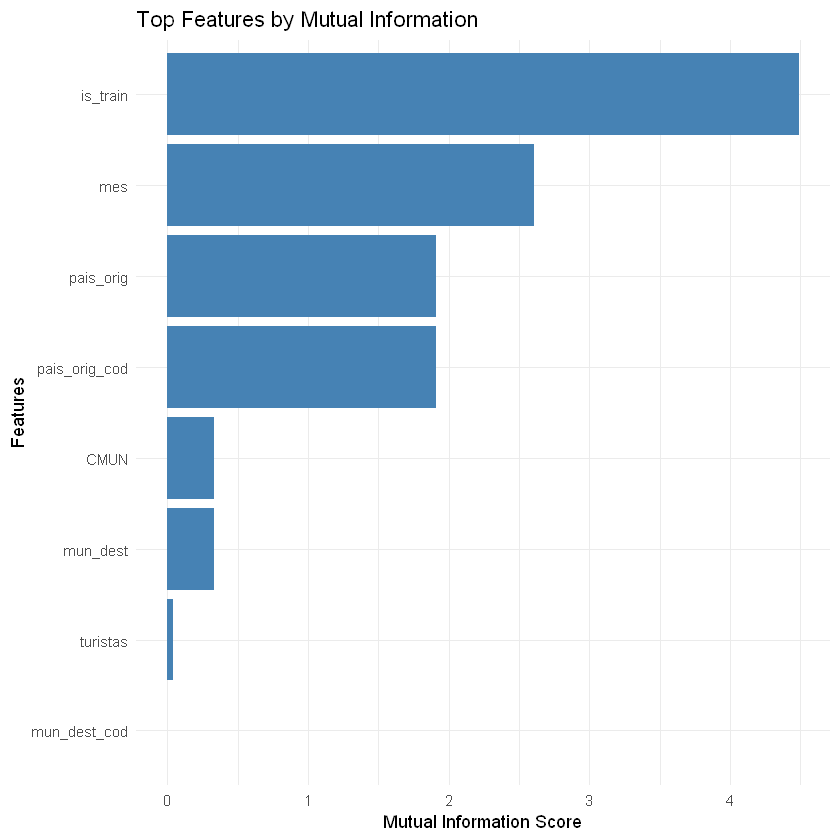

In [13]:

# install the necessary packages if not already installed
if (!require(FSelectorRcpp)) {
  install.packages('FSelectorRcpp')
}

# Load necessary library
library(FSelectorRcpp)

# Calculate mutual information between each variable and the target
mi_scores <- information_gain(data[, setdiff(names(data), "Target")], data$Target)

# Convert the top_features object into a dataframe
mi_scores_df <- as.data.frame(mi_scores)

# Rename the columns
names(mi_scores_df) <- c("Feature", "Score")

# Order the dataframe by Score in descending order
mi_scores_df <- mi_scores_df[order(-mi_scores_df$Score),]

# Create a bar plot
ggplot(mi_scores_df, aes(x = reorder(Feature, Score), y = Score)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  xlab("Features") +
  ylab("Mutual Information Score") +
  ggtitle("Top Features by Mutual Information") +
  theme_minimal()
     

### Evaluating a Lineal Regression model

<font color='tomato'>Selecting feature to use</font>

In [16]:

# Select numer of Features to use
k <- 6
     

<font color='darkgrey'><b>Operation</font>

In [17]:
train_set <- subset(data[data$is_train == TRUE, ], select = -is_train)
train_set <- select_if(train_set, is.numeric)
test_set <- subset(data[data$is_train == FALSE, ], select = -is_train)
test_set <- select_if(test_set, is.numeric)
# Fit a linear regression model
model_all_features <- lm(Target ~ ., data = train_set)

# Predict on the test set
predictions <- predict(model_all_features, newdata = test_set)

# Evaluate the model
postResample(pred = predictions, obs = test_set$Target)
     

RMSE     Rsquared          MAE 
2.889941e+01 1.832497e-04 1.696532e+01

## Any data: RFE (Recursive Feature Elimination)

### RFE for Classification

No aplica ya que el Target no es categórico.

<font color='tomato'>Selecting feature to use</font>

In [18]:
# Select numer of Features to use


<font color='darkgrey'><b>Operation</font>

### RFE for Regression

<font color='tomato'>Selecting feature to use</font>

In [23]:

# Select numer of Features to use
k <- 7

<font color='darkgrey'><b>Operation</font>

In [24]:

# Define control parameters for rfe function
ctrl <- rfeControl(functions=lmFuncs, method="cv", number=10)

# Determine number of predictors
predictors_number <- ncol(train_set) - 1 # Assuming the last column is the target variable

# Apply the RFE algorithm with cross validation.
result <- rfe(train_set[, !names(train_set) %in% "Target"], train_set$Target, sizes=c(1:predictors_number), rfeControl=ctrl)

# Print the result
print(result)

# Top ranking variables in the optimal subset size
top_features <- predictors(result, result$optsize)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables  RMSE  Rsquared   MAE RMSESD RsquaredSD  MAESD Selected
         1 29.69 0.0003503 17.35  1.175  0.0003394 0.2545         
         2 29.69 0.0003571 17.35  1.175  0.0003540 0.2547        *

The top 2 variables (out of 2):
   mun_dest_cod, turistas

